<a href="https://colab.research.google.com/github/amartinezfigueroa/ProyectoFinal_Mundiplants/blob/main/Proyect_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

#descargar el set de datos de flores
datos, metadatos = tfds.load('tf_flowers', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


,image,label
0,,2 (tulips)
1,,3 (sunflowers)
2,,3 (sunflowers)
3,,4 (roses)
4,,3 (sunflowers)

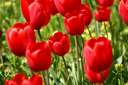
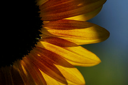
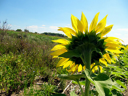
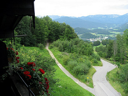
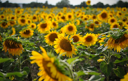

In [3]:
tfds.as_dataframe(datos['train'].take(5), metadatos)

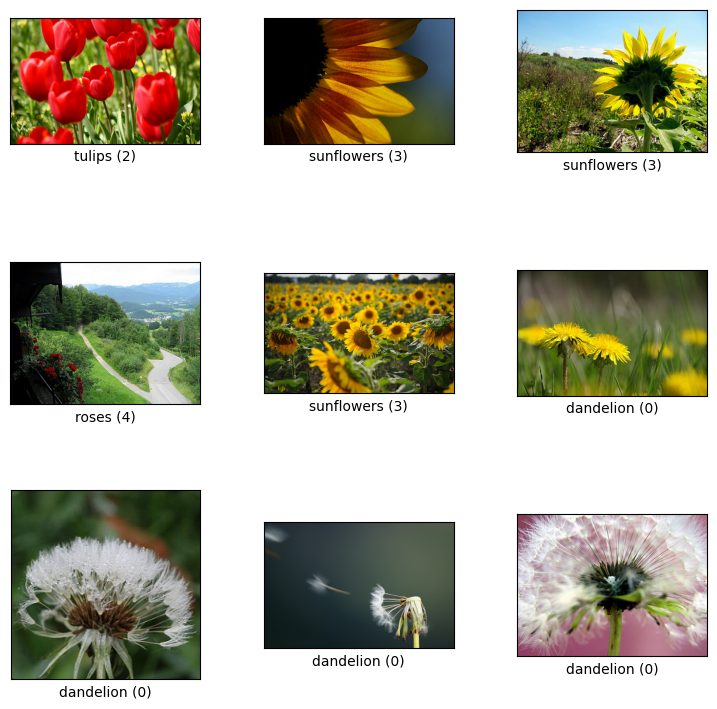

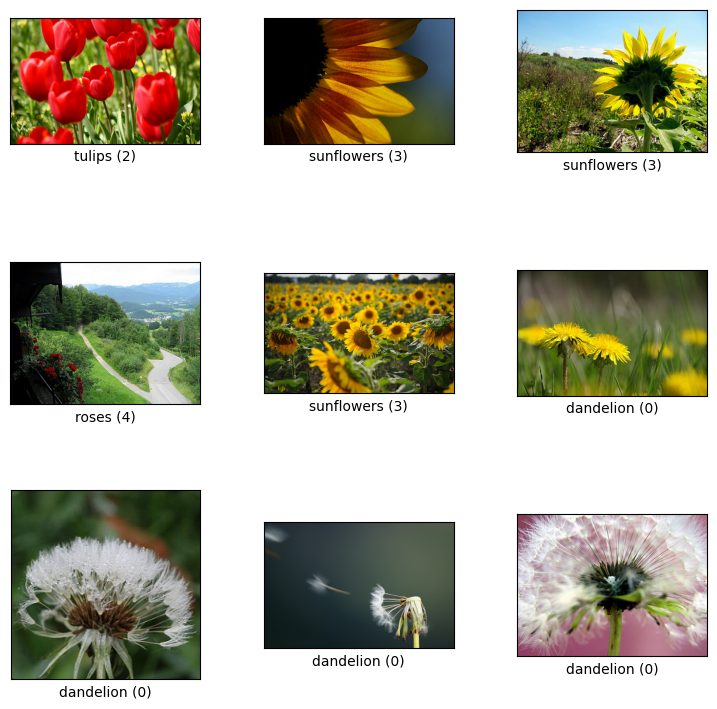

In [4]:
tfds.show_examples(datos['train'], metadatos)

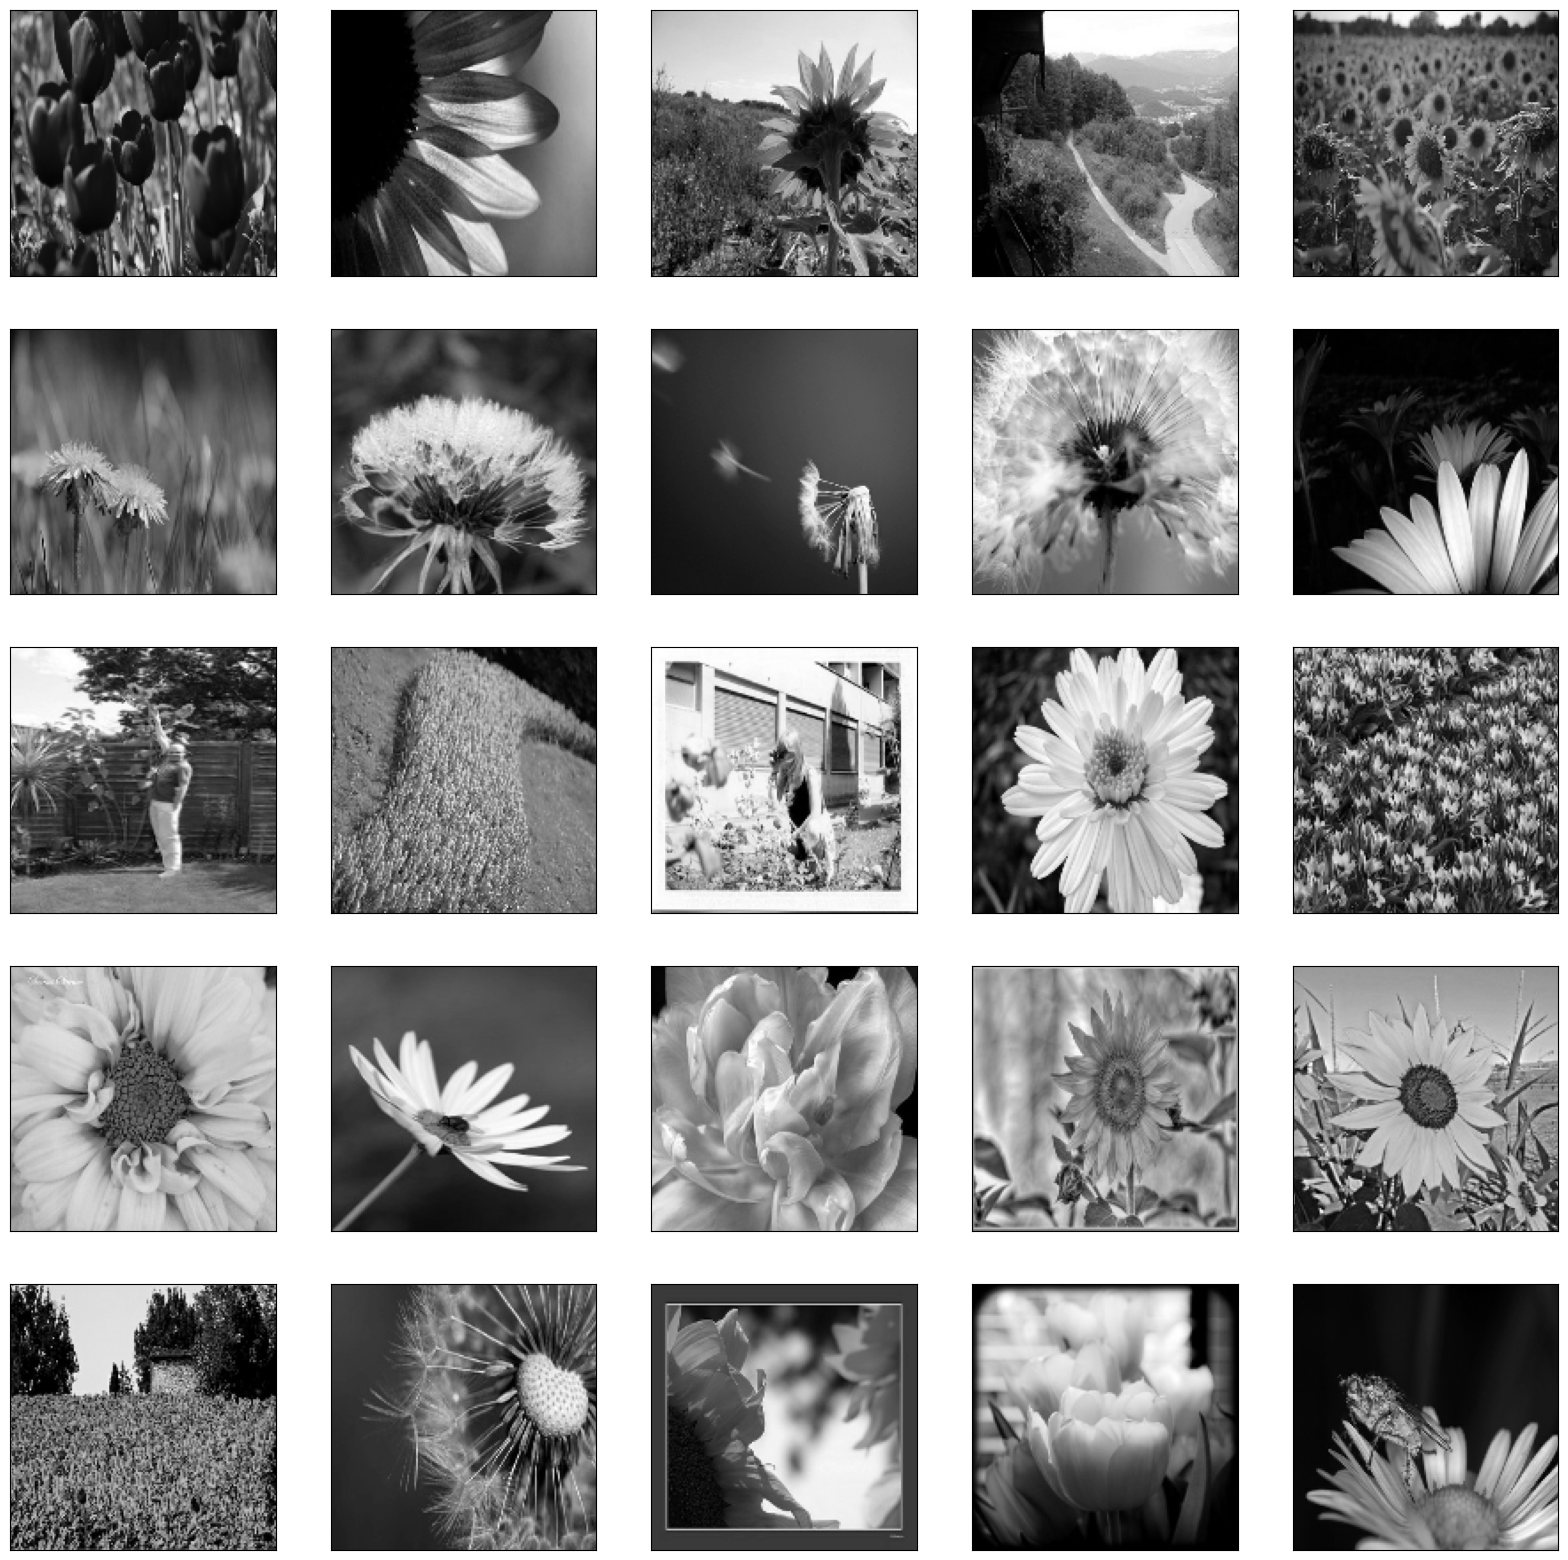

In [13]:
import matplotlib.pyplot as plt
#dar el mismo tamaño a las imagenes ya que la red tendran una cantidad fija de neuronas para eso importamos la sig lib
import cv2

plt.figure(figsize=(20,20)) #hacer las imagenes mas grandes

TAMANO_IMG=150

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG) )
  #pasar las imagenes a BN
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5,5,i+1)
  #mostrar imagen sin numeros
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray') #cmap para indicar que solo se manejara un canal de color

In [14]:
datos_entrenamiento = []

In [15]:
for i,(imagen, etiqueta) in enumerate(datos['train']): #todos los datos
 imagen = cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG) )
 imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
 imagen = imagen.reshape(TAMANO_IMG,TAMANO_IMG, 1) #cambiar tamaño a 150,150, 1
 datos_entrenamiento.append([imagen,etiqueta])

In [16]:
datos_entrenamiento[0]

[array([[[ 91],
         [104],
         [110],
         ...,
         [ 21],
         [ 45],
         [104]],
 
        [[ 97],
         [107],
         [116],
         ...,
         [ 21],
         [ 81],
         [ 95]],
 
        [[ 99],
         [105],
         [117],
         ...,
         [ 22],
         [ 96],
         [ 84]],
 
        ...,
 
        [[ 35],
         [ 39],
         [ 24],
         ...,
         [ 94],
         [180],
         [ 92]],
 
        [[ 38],
         [ 34],
         [ 35],
         ...,
         [194],
         [169],
         [145]],
 
        [[ 29],
         [ 29],
         [ 33],
         ...,
         [172],
         [183],
         [182]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=2>]

In [17]:
len(datos_entrenamiento)

3670

In [18]:
x = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (tipo de flor)

for imagen, etiqueta in datos_entrenamiento:
  x.append(imagen)
  y.append(etiqueta)

In [21]:
x

array([[[[0.35686275],
         [0.40784314],
         [0.43137255],
         ...,
         [0.08235294],
         [0.17647059],
         [0.40784314]],

        [[0.38039216],
         [0.41960784],
         [0.45490196],
         ...,
         [0.08235294],
         [0.31764706],
         [0.37254902]],

        [[0.38823529],
         [0.41176471],
         [0.45882353],
         ...,
         [0.08627451],
         [0.37647059],
         [0.32941176]],

        ...,

        [[0.1372549 ],
         [0.15294118],
         [0.09411765],
         ...,
         [0.36862745],
         [0.70588235],
         [0.36078431]],

        [[0.14901961],
         [0.13333333],
         [0.1372549 ],
         ...,
         [0.76078431],
         [0.6627451 ],
         [0.56862745]],

        [[0.11372549],
         [0.11372549],
         [0.12941176],
         ...,
         [0.6745098 ],
         [0.71764706],
         [0.71372549]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [20]:
import numpy as np

x = np.array(x).astype(float) / 255

In [22]:
y = np.array(y)

In [23]:
y

array([2, 3, 3, ..., 2, 0, 3])

In [24]:
x.shape

(3670, 150, 150, 1)

In [25]:
modeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150,150,1)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(2, activation='sigmoid')
  ])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(2, activation='sigmoid')
  ])

In [26]:
modeloDenso.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
modeloCNN.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
modeloCNN2.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import TensorBoard